## In this notebook we will compare the AWS Sagemaker model and the custom model.

## 1. Importing libraries

First we import all the libraries to load the model and to test it.

In [24]:
import pandas as pd
from pycaret.time_series import *
import matplotlib.pyplot as plt
import xgboost as xgb

## 2. Loading the data

We load the data which will be used to make the model predictions on. We use the test_20.csv file because this way, we can ensure that the model is tested on previously unseen data.

In [25]:
data = pd.read_csv(".\\Datasets\\test_20.csv")
data

,yearmonth,price
0,2012-12,13467104028
1,2013-01,10677728282
2,2013-02,10656533732
3,2013-03,12940255818
4,2013-04,12468308389
5,2013-05,15859143526
6,2013-06,16322141867
7,2013-07,19353399006
8,2013-08,20939669718
9,2013-09,19390192591


## 3. Preparing the test data

Next up, we convert the `yearmonth` class values to datetime values. This way we can make seperate class like the `year` class, which contains the year of the value, `month` which contains the month of the value and `quarter` which containst the quarter in which the value is located.

This way, the AI can make seasonal predictions. It can also recognize patterns between different months each year or between certain years or quarters.

We then create the test data by dropping the price column from our dataset.

Lastly we convert the columns to categorical types.

In [ ]:
# data augmentation
data['yearmonth'] = pd.to_datetime(data['yearmonth'])
data['year'] = data['yearmonth'].dt.year
data['month'] = data['yearmonth'].dt.month
data['quarter'] = data['yearmonth'].dt.quarter

# Create test data
test_data = data.copy()
test_data = test_data.drop(columns=['price'])

# Convert to categorical
test_data['yearmonth'] = test_data["yearmonth"].astype("category")
test_data['year'] = test_data["year"].astype("category")
test_data['month'] = test_data["month"].astype("category")
test_data['quarter'] = test_data["quarter"].astype("category")

## 4.Loading the models.

After preparing the test data, we import the AWS Sagemaker model.

In [ ]:
# Load the XGBoost model
model_path = ".\\Models\\xgboost-model"
model = xgb.Booster()
model.load_model(model_path)
print("Model loaded successfully.")

Model loaded successfully.
[4.6363546e+09 3.4498985e+09 3.4498985e+09 3.3371489e+09 4.6881889e+09
 3.5177848e+09 3.9780086e+09 5.2284928e+09 4.7381146e+09 5.1381023e+09
 4.8827116e+09 4.4768645e+09 4.6363546e+09 3.4498985e+09 3.4498985e+09
 3.3371489e+09 4.6881889e+09 3.5177848e+09 3.9780086e+09 5.2284928e+09
 4.7381146e+09 5.1381023e+09 4.8827116e+09 4.4768645e+09 4.6363546e+09
 3.4498985e+09 3.4498985e+09 3.3371489e+09 4.6881889e+09 3.5177848e+09
 3.9780086e+09 5.2284928e+09 4.7381146e+09 5.1381023e+09 4.8827116e+09
 4.4768645e+09 4.6363546e+09 3.4498985e+09 3.4498985e+09 3.3371489e+09
 4.6881889e+09 3.5177848e+09 3.9780086e+09 5.2284928e+09 4.7381146e+09
 5.1381023e+09 4.8827116e+09 4.4768645e+09 4.6363546e+09 3.4498985e+09
 3.4498985e+09 3.3371489e+09 4.6881889e+09 3.5177848e+09 3.9780086e+09]
[4636354560.0, 3449898496.0, 3449898496.0, 3337148928.0, 4688188928.0, 3517784832.0, 3978008576.0, 5228492800.0, 4738114560.0, 5138102272.0, 4882711552.0, 4476864512.0, 4636354560.0, 34498984

## 5. Creating predictions

We use the `predict()` function to make predictions on the  `test_data` dataset using the AWS Sagemaker model. We then convert the predictions to float values.

In [ ]:
# Convert to DMatrix
dtest = DMatrix(test_data, enable_categorical=True)

# Predict prices
predictions = model.predict(dtest)

# Output predictions
print(predictions)
predictions = [float(p) for p in predictions]
print(predictions)

# True labels
true_labels = data["price"].astype(float).values

## 6. Visualizing the predictions

**6.1 Visualizing the predictions of the AWS Sagemaker model**

We visualize the predictions of the AWS Sagemaker model compared to the real model.

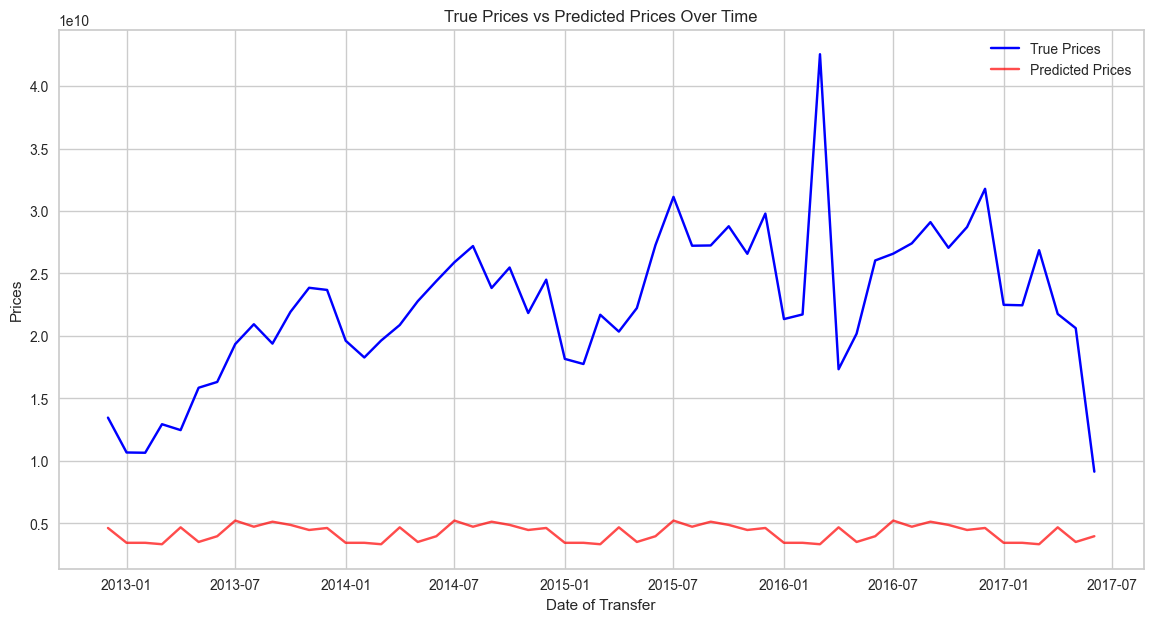

In [28]:
# Assuming 'date of transfer' column is available in test_data
data_graph = data
data_graph.columns = data_graph.columns.str.lower()
data_graph['yearmonth'] = pd.to_datetime(data_graph['yearmonth'])

plt.figure(figsize=(14, 7))
plt.plot(data_graph['yearmonth'], true_labels, label='True Prices', color='blue')
plt.plot(data_graph['yearmonth'], predictions, label='Predicted Prices', color='red', alpha=0.7)
plt.xlabel('Date of Transfer')
plt.ylabel('Prices')
plt.title('True Prices vs Predicted Prices Over Time')
plt.legend()
plt.show()

## 7. Conclusion

At first sight, the predictions of the AWS Sagemaker model doesnt seem accurate, but when you look closer, the AWS Sagemaler was able to predict prices with a reasonable degree of accuracy.  The model captured the overall trend and seasonal patterns in the data, although there were some deviations. 